In [31]:
from pandas.tools.plotting import scatter_matrix, boxplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
credit_card = sm.datasets.ccard.load_pandas().data

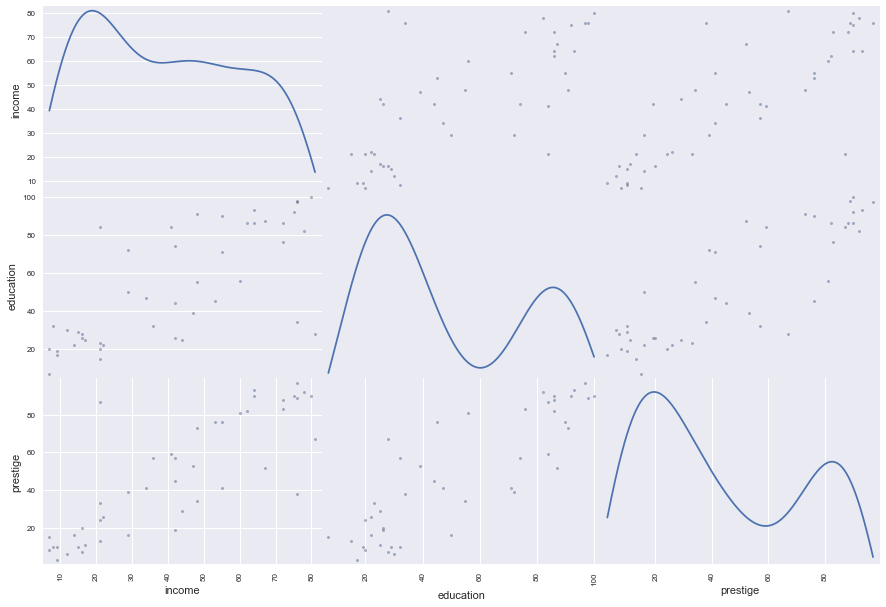

In [3]:
scatter_matrix(prestige, figsize=(15,10), diagonal='kde');

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


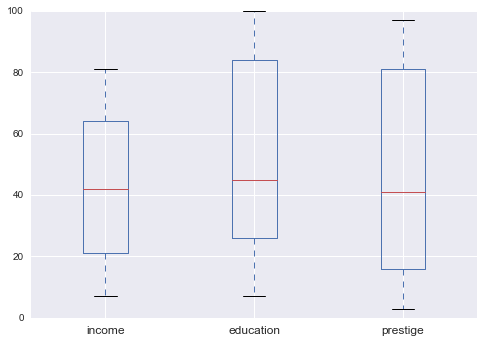

In [4]:
prestige.boxplot();

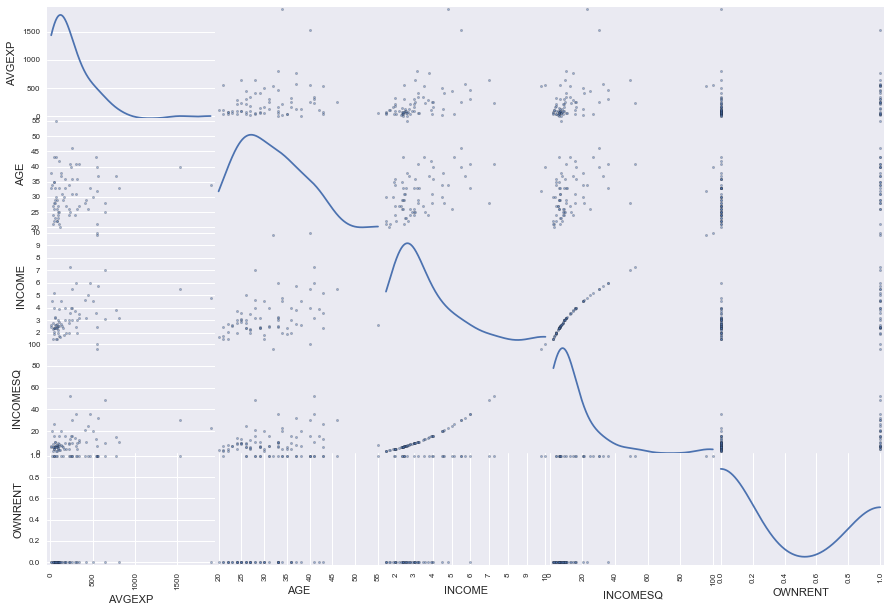

In [5]:
scatter_matrix(credit_card, figsize=(15,10), diagonal='kde');

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


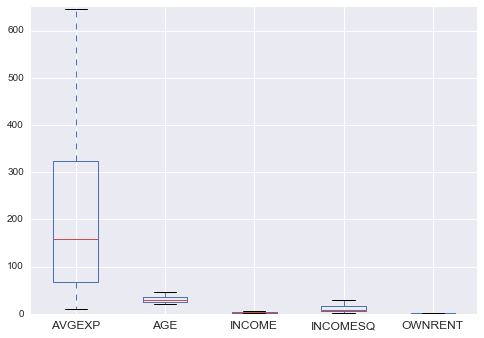

In [24]:
credit_card.boxplot()
plt.ylim(0,650);

In [32]:
credit_card['logged_exp'] = credit_card['AVGEXP'].apply(lambda x : np.log(x))

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


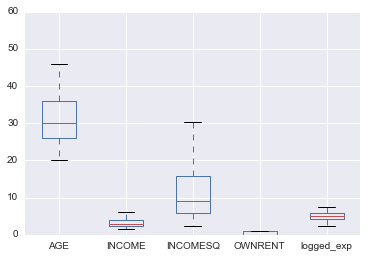

In [43]:
credit_card.drop('AVGEXP', axis=1).boxplot()
plt.ylim(0,60);

In [8]:
x = prestige[['income', 'education']].astype(float)
y = prestige.prestige
prestige_mod = sm.OLS(y, x).fit()
prestige_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           5.30e-28
Time:                        12:09:39   Log-Likelihood:                -180.04
No. Observations:                  45   AIC:                             364.1
Df Residuals:                      43   BIC:                             367.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         0.5483      0.116      4.743      0.000       0.315       0.781
education      0.4958      0.093      5.343      0.000       0.309       0.683
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.366
Skew:                           0.219   Prob(JB):                        0.833
Kurtosis:                       3.055   Cond. No.                         5.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x1 = credit_card[['AGE','INCOMESQ','OWNRENT']]
y1 = credit_card.AVGEXP
cc_mod = sm.OLS(y1,x1).fit()
cc_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AVGEXP   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     22.29
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           3.37e-10
Time:                        12:09:43   Log-Likelihood:                -511.06
No. Observations:                  72   AIC:                             1028.
Df Residuals:                      69   BIC:                             1035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            4.9709      1.643      3.025      0.003       1.693       8.249
INCOMESQ       5.8076      2.259      2.571      0.012       1.301      10.314
OWNRENT       44.0664     83.692      0.527      0.600    -122.894     211.027
==============================================================================
Omnibus:                       73.952   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.810
Skew:                           3.089   Prob(JB):                    3.77e-128
Kurtosis:                      15.548   Cond. No.                         86.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Plot the studentized residuals against the fitted y-values. Why do we need to use the studentized residuals as opposed to just the residuals?
   
   **Hint:** 
   - Use the `outlier_test` function to get the studentized residuals 
   - `model.outlier_test()['student_resid']`  # `model` refers to the fitted model using OLS in statsmodels
  

(-20, 120)

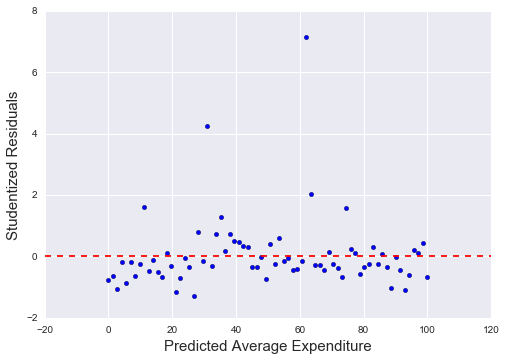

In [21]:
# I studentize the residuals because residuals often vary greatly from one data point to another
# so it is important to compare them after they are normalized.

stud_resids = cc_mod.outlier_test()['student_resid']
x = linspace(0,100, 72)
scatter(x,stud_resids)
plt.hlines(0, -20,120, linestyle='--', color='r')
plt.ylabel('Studentized Residuals', fontsize=15)
plt.xlabel('Predicted Average Expenditure', fontsize=15)
plt.xlim(-20,120);
# b.plot(b['index'], b.student_resid, kind='scatter')

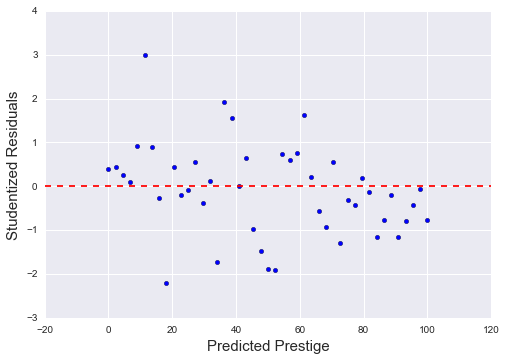

In [22]:
prestige_resids = prestige_mod.outlier_test()['student_resid']
x2 = linspace(0,100,45)
scatter(x2, prestige_resids)
plt.hlines(0, -20,120, linestyle='--', color='r')
plt.ylabel('Studentized Residuals', fontsize=15)
plt.xlabel('Predicted Prestige', fontsize=15)
plt.xlim(-20,120);

In [106]:
# The credit card data is more likely to have heteroskedasticity, as we can see that the residuals
# become less concentrated around the prediction line as PAE increases.

In [23]:
# R^2 improves once the target variable is normalized using the log
log_y = map(math.log, y1)
log_model = sm.OLS(log_y, x1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     270.5
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           4.53e-38
Time:                        12:23:04   Log-Likelihood:                -128.16
No. Observations:                  72   AIC:                             262.3
Df Residuals:                      69   BIC:                             269.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.1457      0.008     18.084      0.000       0.130       0.162
INCOMESQ       0.0201      0.011      1.817      0.073      -0.002       0.042
OWNRENT       -0.1800      0.410     -0.439      0.662      -0.999       0.638
==============================================================================
Omnibus:                        6.166   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.538
Skew:                          -0.662   Prob(JB):                       0.0627
Kurtosis:                       3.302   Cond. No.                         86.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# logged_resids = log_model.outlier_test()['student_resid']
# scatter(logged_resids, x1)
# sm.stats.diagnostic.het_goldfeldquandt(log_y,x1['AGE'])